# 1. Setup

In [1]:
import numpy as np
import pandas as pd
from faker import Faker
from scipy.stats import skewnorm
from datetime import datetime
from sklearn.datasets import (make_regression, make_classification, 
                              make_multilabel_classification, 
                              make_blobs)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor)
from sklearn.multioutput import MultiOutputClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')

# 2. Regression

#### Synthetic Dataset

In [2]:
n = 1000
n_features = 5
seed = 123

In [3]:
X, y = make_regression(n_samples=n, n_features=n_features, 
                       random_state=seed)
columns = [f"feature{i+1}" for i in range(n_features)]
df = pd.concat([pd.DataFrame(X, columns=columns), 
                pd.Series(y, name='target')], axis=1)

In [4]:
df.shape

(1000, 6)

In [5]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-0.475648,-0.971937,-1.793889,-1.570529,-0.264986,-251.427336
1,-2.039363,0.642865,0.451925,-0.202136,-1.326731,-216.058201
2,-0.323134,1.165847,0.062360,0.143981,-0.074564,45.780339
3,1.923513,0.528991,-0.220224,-0.134736,0.744166,215.041958
4,-0.161896,-0.978303,-0.177138,1.745941,1.743212,164.581663


#### Modelling

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed
)

In [7]:
model = RandomForestRegressor(random_state=seed)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [8]:
print(f"Train | MSE: {mean_squared_error(y_train, model.predict(X_train)):.4f}")
print(f"Test | MSE: {mean_squared_error(y_test, model.predict(X_test)):.4f}")

Train | MSE: 217.2017
Test | MSE: 1731.1431


# 3. Classification

## 3.1. Binary Classification

#### Synthetic Dataset

In [9]:
n = 1000
n_features = 5
n_classes = 2
seed = 123

In [10]:
X, y = make_classification(n_samples=n, n_features=n_features, 
                           n_classes=n_classes, random_state=seed)
columns = [f"feature{i+1}" for i in range(n_features)]
df = pd.concat([pd.DataFrame(X, columns=columns), 
                pd.Series(y, name='target')], axis=1)

In [11]:
df.shape

(1000, 6)

In [12]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,0.877281,-0.596428,0.440198,-0.521081,0.314323,0
1,0.558565,-0.414513,0.813623,-0.543254,0.147343,0
2,-0.902899,0.383033,-0.711573,-0.867689,-0.673941,0
3,-0.487632,0.453529,-0.898803,1.031794,0.010530,1
4,1.828812,-0.921814,-0.663395,0.869497,1.143414,1


#### Modelling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=seed
)

In [14]:
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [15]:
print(f"Train | ROC-AUC: {roc_auc_score(y_train, model.predict_proba(X_train)[:,1]):.4f}")
print(f"Test | ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.4f}")

Train | ROC-AUC: 1.0000
Test | ROC-AUC: 0.9903


## 3.1. Multi-Label Classification

#### Synthetic Dataset

In [16]:
n = 1000
n_features = 5
n_classes = 4
seed = 123

In [17]:
X, Y = make_multilabel_classification(n_samples=n, 
                                      n_features=n_features, 
                                      n_classes=n_classes, 
                                      random_state=seed)

In [18]:
x_columns = [f"feature{i+1}" for i in range(n_features)]
y_columns = [f"target{i+1}" for i in range(n_classes)]
df = pd.concat([pd.DataFrame(X, columns=x_columns), 
                pd.DataFrame(Y, columns=y_columns)], axis=1)

In [19]:
df.shape

(1000, 9)

In [20]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target1,target2,target3,target4
0,8.0,8.0,10.0,5.0,8.0,1,0,1,0
1,8.0,13.0,5.0,4.0,12.0,1,1,1,0
2,12.0,9.0,7.0,9.0,11.0,1,0,1,1
3,16.0,6.0,11.0,6.0,10.0,1,0,0,1
4,17.0,9.0,7.0,10.0,8.0,0,0,0,0


#### Modelling

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=seed
)

In [22]:
model = MultiOutputClassifier(
    RandomForestClassifier(random_state=seed)
)
model.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=123))

In [23]:
print(f"Train | Accuracy by class: {np.round(np.mean(Y_train==model.predict(X_train), axis=0),4)}")
print(f"Test | Accuracy by class: {np.round(np.mean(Y_test==model.predict(X_test), axis=0),4)}")

Train | Accuracy by class: [1.     1.     1.     0.9987]
Test | Accuracy by class: [0.72  0.736 0.76  0.62 ]


# 4. Clustering

#### Synthetic Dataset

In [24]:
n = 1000
n_features = 5
seed = 123

In [25]:
X, y = make_blobs(n_samples=n, n_features=n_features, 
                  centers=4, random_state=seed)

In [26]:
columns = [f"feature{i+1}" for i in range(n_features)]
df = pd.concat([pd.DataFrame(X, columns=columns), 
                pd.Series(y, name='target')], axis=1)

In [27]:
df.shape

(1000, 6)

In [28]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,3.238892,-5.649561,-7.125723,0.897681,-0.605298,3
1,-0.038555,8.031020,3.435398,-0.343190,-3.713210,1
2,4.411258,-3.262909,-7.171963,1.754831,4.290620,0
3,-4.692063,4.224571,-0.643463,-9.088922,-2.692780,2
4,5.110698,-7.006590,-7.410673,-0.643952,1.664018,3


#### Modelling

In [29]:
ks = np.arange(2, 11)
sum_squared_distances = []
for k in ks:
    model = KMeans(k, random_state=seed)
    model.fit(X)
    sum_squared_distances.append(model.inertia_)

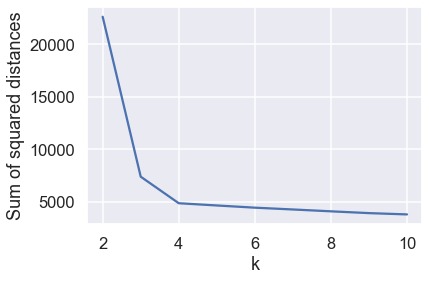

In [30]:
plt.figure(figsize=(6,4))
sns.lineplot(x=ks, y=sum_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum of squared distances');

# 5. Numpy & Pandas

#### Synthetic Dataset

In [31]:
n = 1000
seed = 123

In [32]:
np.random.seed(seed)
df = pd.DataFrame()
df['id'] = np.random.choice(np.arange(10**5, 10**6), n, 
                            replace=False)  # replace=False to ensure unique ids
df['gender'] = np.random.choice(['female', 'male'], n, 
                                p=[0.6, 0.4])
df['age'] = np.random.randint(18, 80, size=n)
df['spend'] = skewnorm.rvs(100, loc=1000, scale=500, size=n)  # create skewed data
df['points'] = np.random.normal(loc=50, scale=10, size=n)  # create data with normal distribution
start_date = pd.Timestamp("2013-01-01")
end_date = pd.Timestamp("2023-02-01")
delta = (end_date-start_date).days
df['date_joined'] = start_date + pd.to_timedelta(np.random.randint(delta, size=n), 'day')

In [33]:
df.shape

(1000, 6)

In [34]:
df.head()

,id,gender,age,spend,points,date_joined
0,832693,male,34,1018.890046,60.575102,2015-10-30
1,350178,female,36,1281.766115,46.743267,2014-06-20
2,737746,male,35,1632.305880,56.505293,2022-04-01
3,764518,male,48,1569.912243,43.170393,2020-04-08
4,693412,female,69,1566.269373,45.185563,2014-11-10


#### Data Check

In [35]:
# Categorical Variable
pd.concat([df['gender'].value_counts(normalize=True),
           df['gender'].value_counts()], axis=1)

,gender,gender
female,0.621,621
male,0.379,379


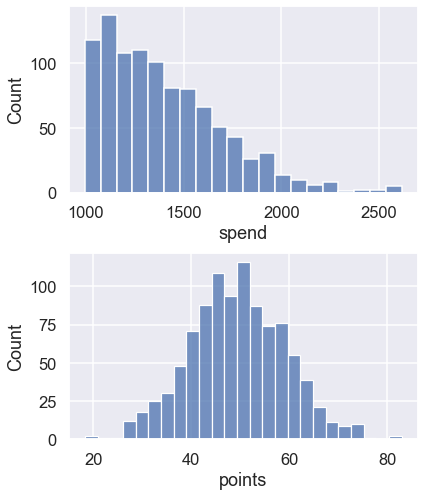

In [36]:
# Numerical Variables
fig, ax = plt.subplots(2, 1, figsize=(6, 7))
sns.histplot(data=df, x='spend', ax=ax[0])
sns.histplot(data=df, x='points', ax=ax[1])
fig.tight_layout();

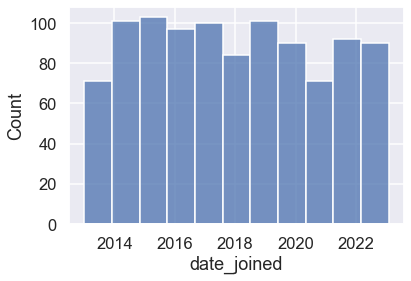

In [37]:
# Date Variable
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='date_joined');

# 6. Faker

#### Synthetic Dataset

`Faker` is a library to create fake datasets. The way we work with the library is quite simple, we first initialise a `Faker` object: `fake = Faker()`. Then we can access a whole ranges of methods it offers by `fake.<method_name()>`. For example, check out `fake.name()`. Here’s a sample dataset we can create using the library:

In [38]:
n = 1000
see = 123

In [39]:
df = pd.DataFrame()
fake = Faker()
fake.seed_instance(seed)
np.random.seed(seed)
start_date = datetime(1940, 1, 1)
end_date = datetime(2005, 2, 1)
for i in range(n):
    df.loc[i, 'birthday'] = fake.date_between(start_date, end_date).strftime('%Y-%m-%d')
    df.loc[i, 'first_name'] = fake.first_name()
    df.loc[i, 'last_name'] = fake.last_name()
    df.loc[i, 'email'] = f"{df.loc[i, 'first_name'].lower()}@{fake.domain_name()}"
    df.loc[i, 'phone_number'] = fake.phone_number()

In [40]:
df.shape

(1000, 5)

In [41]:
df.head()

,birthday,first_name,last_name,email,phone_number
0,1943-07-25,Joseph,Mack,joseph@rodriguez-santana.com,(885)502-2585x3206
1,1992-08-22,Christopher,Harper,christopher@smith.info,012-204-6974
2,1971-12-08,Mary,Mack,mary@boyd-webb.org,+1-895-068-6897x8658
3,1942-03-02,Melanie,Brewer,melanie@wilkins.com,586-176-9503x91505
4,1955-08-04,Richard,Mason,richard@fowler.com,+1-722-876-7002


#### Dummy Sentences

In [42]:
corpus = [fake.sentence() for i in range(n)]
corpus[:5]

['Several join physical phone detail.',
 'War sister girl lot.',
 'Big find economic travel sister challenge attorney.',
 'Window likely activity whether grow dark add.',
 'Oil born nice rather current.']

There are also slightly different versions of this depending on what we are after: `fake.sentences()`, `fake.paragraph()` or `fake.paragraphs()`.

For more information about the `Faker` library, here’s its [GitHub](https://github.com/joke2k/faker/blob/master/docs/fakerclass.rst) documentation.